In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from PIL import Image


In [8]:
data_dir = r"C:\Users\baeso\OneDrive\Escritorio\Malaria-Detection-Model\data"
parasitized_dir = os.path.join(data_dir, "Parasitized")
uninfected_dir = os.path.join(data_dir, "Uninfected")



In [9]:
print(f"Parasitized: {len(os.listdir(parasitized_dir))}")
print(f"Uninfected: {len(os.listdir(uninfected_dir))}")


Parasitized: 13780
Uninfected: 13780


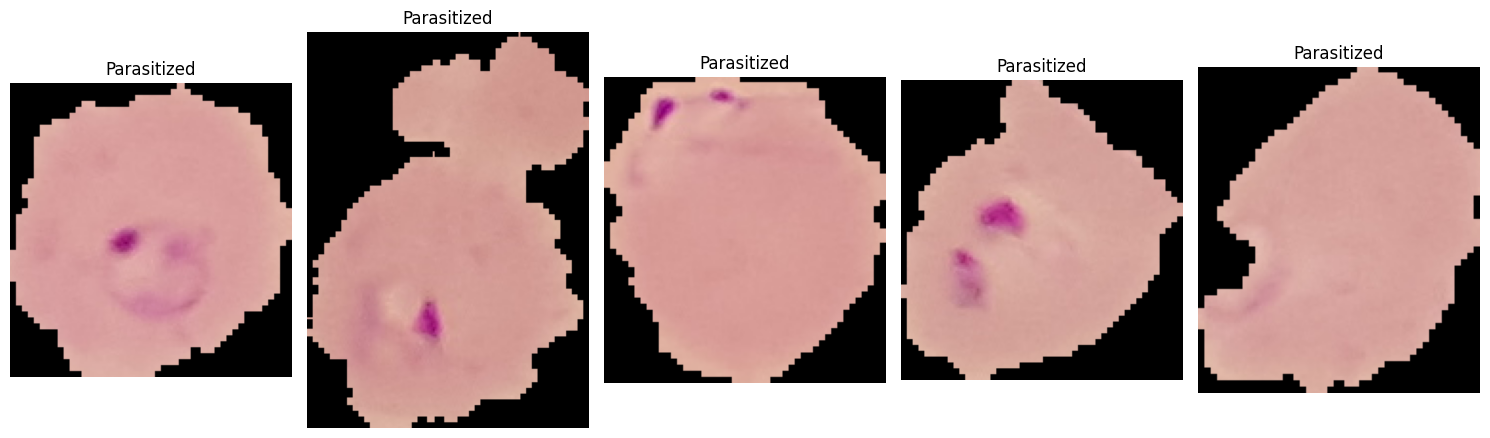

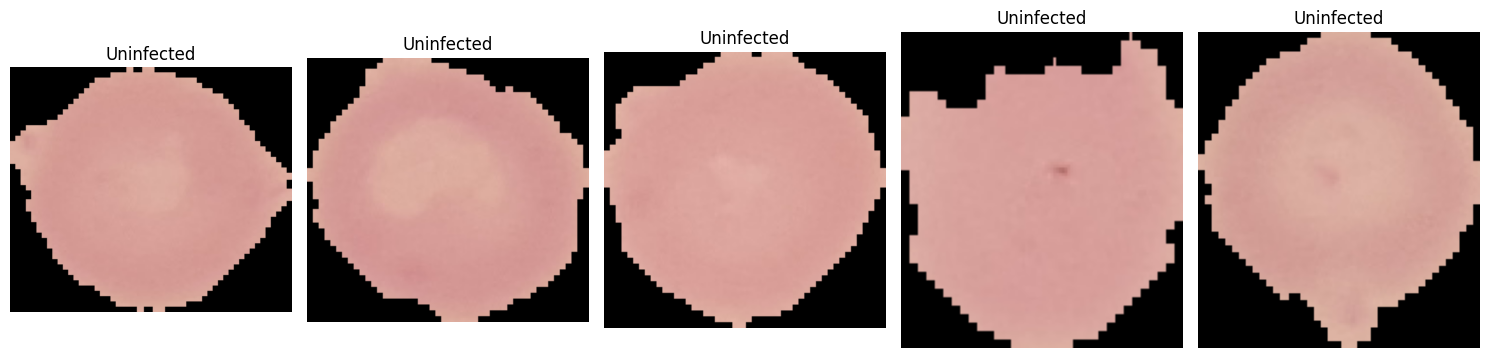

In [10]:
def show_images(folder, label, n=5):
    files = os.listdir(folder)[:n]
    fig, axs = plt.subplots(1, n, figsize=(15, 5))
    for i, img_file in enumerate(files):
        img = Image.open(os.path.join(folder, img_file))
        axs[i].imshow(img)
        axs[i].axis('off')
        axs[i].set_title(label)
    plt.tight_layout()
    plt.show()

show_images(parasitized_dir, "Parasitized")
show_images(uninfected_dir, "Uninfected")


In [13]:
from collections import Counter

valid_extensions = (".jpg", ".jpeg", ".png")

def image_shapes(folder):
    sizes = []
    for img_file in os.listdir(folder):
        if not img_file.lower().endswith(valid_extensions):
            continue  # ignorar archivos no válidos
        img_path = os.path.join(folder, img_file)
        try:
            img = Image.open(img_path)
            sizes.append(img.size)
        except:
            print(f"Error with image: {img_file}")
    return Counter(sizes)


print("Parasitized sizes:", image_shapes(parasitized_dir).most_common(5))
print("Uninfected sizes:", image_shapes(uninfected_dir).most_common(5))


Parasitized sizes: [((130, 130), 105), ((130, 133), 91), ((127, 130), 90), ((124, 124), 88), ((127, 124), 87)]
Uninfected sizes: [((130, 130), 119), ((127, 124), 113), ((127, 130), 109), ((136, 130), 106), ((124, 121), 106)]


**Note:**
We can notice that not all the images have the same size.  
For example, there are 105 images with a size of 130×130 pixels, then 91 images with 130×133 pixels, and so on.  
Therefore, we need to resize all of these images during the preprocessing stage.

In [15]:
def check_corrupt_images(folder):
    corrupt = []
    for img_file in os.listdir(folder):
        try:
            img = Image.open(os.path.join(folder, img_file))
            img.verify()
        except:
            corrupt.append(img_file)
    return corrupt

corrupt_parasitized = check_corrupt_images(parasitized_dir)
corrupt_uninfected = check_corrupt_images(uninfected_dir)

print(f"Corrupt in Parasitized: {corrupt_parasitized}")
print(f"Corrupt in Uninfected: {corrupt_uninfected}")


Corrupt in Parasitized: ['Thumbs.db']
Corrupt in Uninfected: ['Thumbs.db']


**Note:** We have identified 1 corrupt image in the Parasitized folder and 1 corrupt image in the Uninfected folder. These files are not valid image formats (they are likely Thumbs.db), so we will skip and ignore them during processing.

In [19]:
def mean_color(folder, n=100):
    means = []
    files = os.listdir(folder)[:n]
    for f in files:
        img = cv2.imread(os.path.join(folder, f))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        means.append(np.mean(img, axis=(0, 1)))
    return np.mean(means, axis=0)

print("Mean color - Parasitized:", mean_color(parasitized_dir))
print("Mean color - Uninfected:", mean_color(uninfected_dir))


Mean color - Parasitized: [141.05672769  99.74035092  99.01252463]
Mean color - Uninfected: [142.67721041 104.84542045 100.19891556]


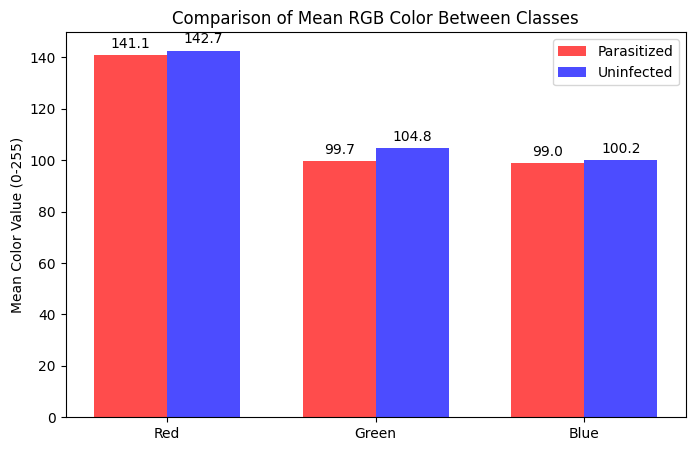

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Valores de mean color que ya tienes
mean_parasitized = np.array([141.0567, 99.7403, 99.0125])
mean_uninfected = np.array([142.6772, 104.8454, 100.1989])

# Canales de color
channels = ['Red', 'Green', 'Blue']

x = np.arange(len(channels))  # posiciones para barras

width = 0.35  # ancho de las barras

fig, ax = plt.subplots(figsize=(8, 5))
bars1 = ax.bar(x - width/2, mean_parasitized, width, label='Parasitized', color='r', alpha=0.7)
bars2 = ax.bar(x + width/2, mean_uninfected, width, label='Uninfected', color='b', alpha=0.7)

# Etiquetas y título
ax.set_ylabel('Mean Color Value (0-255)')
ax.set_title('Comparison of Mean RGB Color Between Classes')
ax.set_xticks(x)
ax.set_xticklabels(channels)
ax.legend()

# Añadir valor encima de cada barra
def add_values(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.1f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # desplazamiento vertical
                    textcoords="offset points",
                    ha='center', va='bottom')

add_values(bars1)
add_values(bars2)

plt.show()


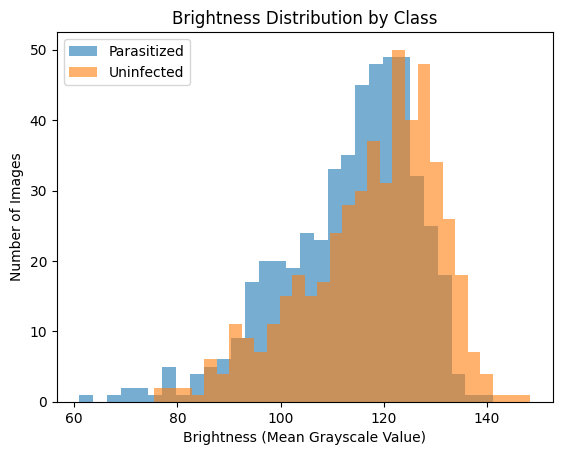

In [21]:
def brightness_values(folder, n=None):
    brightness = []
    files = os.listdir(folder)
    if n:
        files = files[:n]
    for f in files:
        if not f.lower().endswith(('.jpg', '.jpeg', '.png')):
            continue
        img = cv2.imread(os.path.join(folder, f))
        if img is None:
            continue
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # escala de grises (brillo)
        brightness.append(np.mean(gray))
    return brightness

parasitized_brightness = brightness_values(parasitized_dir, n=500)
uninfected_brightness = brightness_values(uninfected_dir, n=500)

plt.hist(parasitized_brightness, bins=30, alpha=0.6, label='Parasitized')
plt.hist(uninfected_brightness, bins=30, alpha=0.6, label='Uninfected')
plt.xlabel('Brightness (Mean Grayscale Value)')
plt.ylabel('Number of Images')
plt.title('Brightness Distribution by Class')
plt.legend()
plt.show()